**Tutotrial 1**

In this tutorial, we shall use famous Python packages to do basic data analysis. This includes Pandas, Sklearn and Pandas profiling package.

Run the following code to start installing Python packages.

In [ ]:
import sys
!{sys.executable} -m pip install -U pandas-profiling
!jupyter nbextension enable --py widgetsnbextension
!pip install matplotlib
!pip install graphviz

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


Upload your data set file to Google Drive. I am uploading german_credit.arff file. We can also uplaod the CSV file but with the CSV file, we shall have to define categorical and numeric data types correctly. In the case of arff files, I have already defined the correct data types. This means you just need to run the following code snippet to load correct data types for the three dataset in this project..

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank.arff to bank.arff


In [ ]:
import pandas as pd
from scipy.io import arff
import numpy as np

#data_file="german_credit.arff"
# If using other datasets then comment the above line and uncomment one of the following two lines
data_file="bank.arff"
#data_file="churn.arff"
data=arff.loadarff(data_file)

df=pd.DataFrame(data[0])
for col in df.columns:
  if df[col].dtype=='object':
    #making sure data is not read as bytes but as string values from a file
    df[col] = df[col].str.decode('utf-8')
#Look at loaded data and data types
print(df.dtypes)



age          float64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day          float64
month         object
duration     float64
campaign     float64
pdays        float64
previous     float64
poutcome      object
y             object
dtype: object


In [ ]:
# Let's display first 10 records 
df.head(10)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30.0,unemployed,married,primary,no,1787.0,no,no,cellular,19.0,oct,79.0,1.0,-1.0,0.0,unknown,no
1,33.0,services,married,secondary,no,4789.0,yes,yes,cellular,11.0,may,220.0,1.0,339.0,4.0,failure,no
2,35.0,management,single,tertiary,no,1350.0,yes,no,cellular,16.0,apr,185.0,1.0,330.0,1.0,failure,no
3,30.0,management,married,tertiary,no,1476.0,yes,yes,unknown,3.0,jun,199.0,4.0,-1.0,0.0,unknown,no
4,59.0,blue-collar,married,secondary,no,0.0,yes,no,unknown,5.0,may,226.0,1.0,-1.0,0.0,unknown,no
5,35.0,management,single,tertiary,no,747.0,no,no,cellular,23.0,feb,141.0,2.0,176.0,3.0,failure,no
6,36.0,self-employed,married,tertiary,no,307.0,yes,no,cellular,14.0,may,341.0,1.0,330.0,2.0,other,no
7,39.0,technician,married,secondary,no,147.0,yes,no,cellular,6.0,may,151.0,2.0,-1.0,0.0,unknown,no
8,41.0,entrepreneur,married,tertiary,no,221.0,yes,no,unknown,14.0,may,57.0,2.0,-1.0,0.0,unknown,no
9,43.0,services,married,primary,no,-88.0,yes,yes,cellular,17.0,apr,313.0,1.0,147.0,2.0,failure,no


In [ ]:
# look at meta information about data, such as null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4521 non-null   float64
 1   job        4521 non-null   object 
 2   marital    4521 non-null   object 
 3   education  4521 non-null   object 
 4   default    4521 non-null   object 
 5   balance    4521 non-null   float64
 6   housing    4521 non-null   object 
 7   loan       4521 non-null   object 
 8   contact    4521 non-null   object 
 9   day        4521 non-null   float64
 10  month      4521 non-null   object 
 11  duration   4521 non-null   float64
 12  campaign   4521 non-null   float64
 13  pdays      4521 non-null   float64
 14  previous   4521 non-null   float64
 15  poutcome   4521 non-null   object 
 16  y          4521 non-null   object 
dtypes: float64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
# Let's see meta information about numeric data, we can also see if there any extreme values
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


# *There are two sections in this tutorial. First section only works if data already has numeric encoding, and second section converts any categorical values (e.g., string values) to numeric encoding. German Credit card data set would work in both sections and other datasets would require their string values to be encoded into numeric first, so they will work with only Section 2.* 

# Section 1
### Test Section 1 with only German credit card dataset.


**Let's develop a decison tree in Python**

In [ ]:
# First split the data into train and test set
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
# Our class column is Creditability here and everything else will be used as features 
class_col_name='Creditability' 

feature_names=df.columns[df.columns != class_col_name ]
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, feature_names], df[class_col_name], test_size=0.3,random_state=1) 

Below is the code to train the decision tree. I am setting max depth of the tree to 5, you can choose to change it or remove it.

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
print("Successfuly trained the decision tree...")

Successfuly trained the decision tree...


If you want to learn more about any Python statement just use help function; e.g., here  I am displaying help on decision tree

In [ ]:
help(tree.DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_d

Let's plot the ree using the following code. Here I am just passing feature_names, tree model (clf) and class values to the grpahviz function.

class Names ['1' '0']


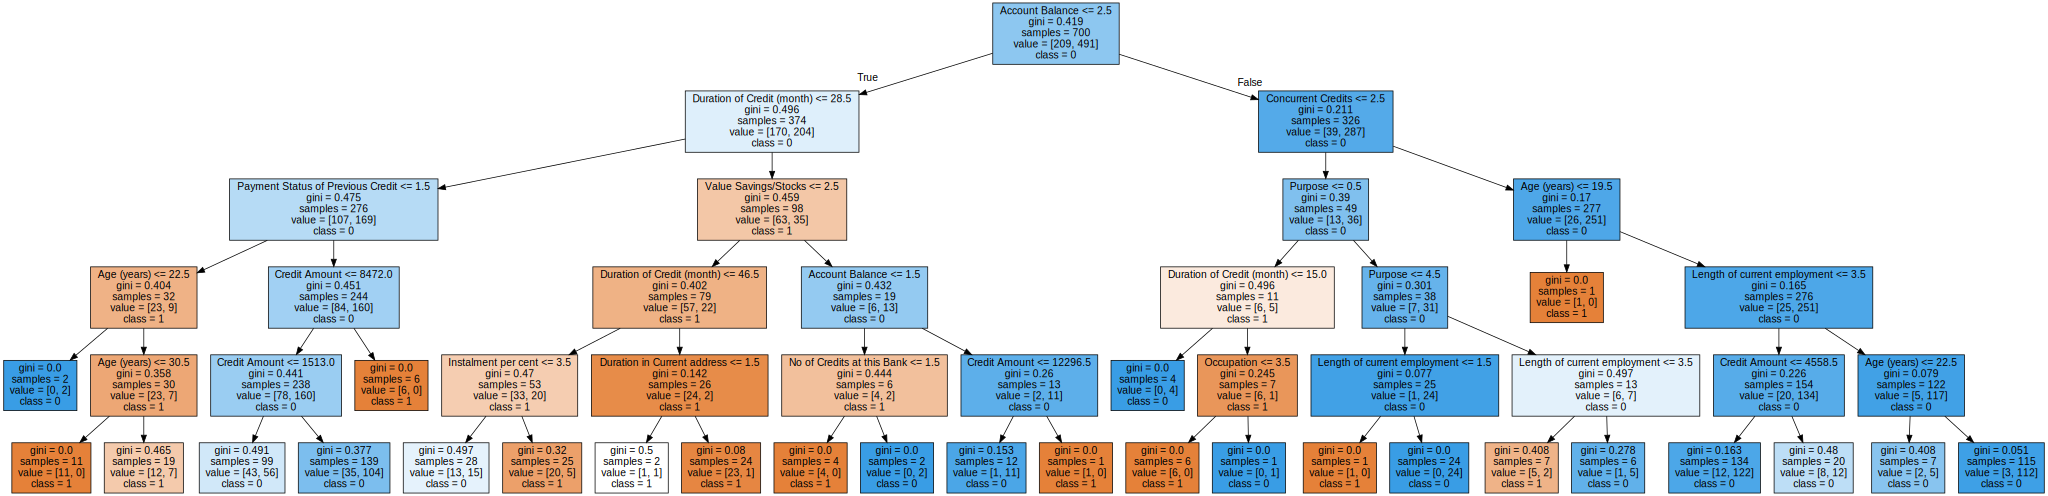

In [ ]:
import graphviz
#Get unique class values to display on the tree
class_values=df[class_col_name].unique()
print ("class Names",class_values)


dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names,  
                                class_names=class_values,
                                filled=True)
# Plot tree
graph = graphviz.Source(dot_data, format="png") 
graph



In the tree above, decsion tree used the categorical attribute as numeric attribute and generated results. This is because values in each of the categorical attribute was already encoded as numbers (1,2,3...etc.). This type of categorical encoding to numeric values is called Label encoding. It is valid to use this sort of method but it has a disadvantage that higher number could mean bigger weight for a value but it may just be a different value. We shall see another method to avoid this below. If we had strings in values, then the above code would have generated an error. Recall that decision tree algorithm can handle categorical and numerical data but Sklearn's implementation can only handle numeric data types. So it is not a comprehensive implementation of decision tree. 

In [ ]:
# Let's make the prdictions on the test set  that we set aside earlier using the trained tree
y_pred = clf.predict(X_test)


Time to get rid of any confusion about prediction accuracy and print our confusion matrix.

In [ ]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[ 29  62]
 [  8 201]]
TP:  201 , FP:  62 , TN:  29 , FN: 8


In [ ]:
#print precision, recall, and accuracy from the perspective of each of the class (0 and 1 for German dataset)
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.32      0.45        91
           1       0.76      0.96      0.85       209

    accuracy                           0.77       300
   macro avg       0.77      0.64      0.65       300
weighted avg       0.77      0.77      0.73       300



**In a similar way, we can train and test Naive Bayes**

Multinomial Naive Bayes is the Naive Bayes type we studied in the class. Recall that the NB that we studied measures the conditional probabilites of words by using their counts/frequencies in each document . In the lab 6, you used CountVectorizer class in Sklearn pacakge to convert documents and words into a table/matrix where each column represented a word and each row represented a document. In the case of the dataset that we are using now, it is already in the form of a table/matrix. Each row represents one record (a kinda document) and each column represents one attribute (a kinda word). After the matrix of frequencies, remaining process is the same.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)

In [ ]:
print ("Total Columns (including class)",len(df.columns))

Total Columns (including class) 21


Let's understand our Naive Bayes model

In [ ]:
print("Number of features used ",nb.n_features_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  20
Classes  ['0' '1']
Number of records for classes  [209. 491.]
Log prior probability for classes  [-1.20874608 -0.35463621]
Log conditional probability for each feature given a class
 [[-7.66053824 -5.09289346 -7.52920224 -7.2442712  -0.02385625 -7.77176387
  -7.16792253 -7.18335493 -7.34322437 -8.16470272 -7.27277271 -7.3616411
  -4.77281549 -7.37473764 -7.66053824 -7.98653918 -7.23113472 -8.16470272
  -7.97617639 -8.28352364]
 [-6.96381256 -5.09018055 -7.03265538 -7.02592638 -0.03094527 -7.19521844
  -6.79713562 -6.95892257 -7.02443718 -7.89278845 -6.9965557  -7.21662871
  -4.4432513  -7.02816435 -7.36613136 -7.65976479 -6.96451308 -7.8874834
  -7.68825674 -7.98173594]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


Again just like decsion tree, NB here used the label encoding (categories to ordinal values) as numerical values to measure log probabilities. This means, it used different values of each feature as frequencies which semantically may or may not be correct, as a higher value (like 2 ,3 and more) would mean more weight. We can solve this using one-hot encoding later but some people use this form of encoding in practice too. For now, let's see classification report.

In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.39      0.41      0.40        91
           1       0.74      0.72      0.73       209

    accuracy                           0.63       300
   macro avg       0.56      0.56      0.56       300
weighted avg       0.63      0.63      0.63       300



# Section 2: Categorical to One-Hot (numeric) Encoding 
# This section works with all datasets
Now, let's try to create on-hot-encoding of categorical variables--i.e., each value in a categorical variable will become a variable itself and its value will be 1 or 0. This way we can encode categorical data into numerical features. More here: https://stackabuse.com/one-hot-encoding-in-python-with-pandas-and-scikit-learn/

In [ ]:
#Let's create a list for our categorical columns for German dataset, we need this later
# for German Credit card
#cat_cols=["Account Balance","Payment Status of Previous Credit","Purpose","Value Savings/Stocks","Length of current employment","Sex & Marital Status"\
        #  ,"Guarantors","Duration in Current address","Most valuable available asset","Concurrent Credits","Type of apartment","Occupation", \
        #  "Telephone","Foreign Worker"]
#*******
#for bank dataset uncomment following line
cat_cols=["job","marital","education","default","housing","loan","contact","month","poutcome"]
#*******
#*******
# for Churn data set uncomment following line
#cat_cols=["State","Area Code", "Phone Number", "Inter Plan","VoiceMail Plan"]
#******


In [ ]:
# Create a copy of the data frame in memory with a different name
df_onehot=df.copy()
#convert only categorical variables/features to dummy/one-hot features
df_onehot = pd.get_dummies(df, columns=cat_cols, prefix = cat_cols)
#print the dataset
df_onehot


,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30.0,1787.0,19.0,79.0,1.0,-1.0,0.0,no,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33.0,4789.0,11.0,220.0,1.0,339.0,4.0,no,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35.0,1350.0,16.0,185.0,1.0,330.0,1.0,no,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30.0,1476.0,3.0,199.0,4.0,-1.0,0.0,no,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59.0,0.0,5.0,226.0,1.0,-1.0,0.0,no,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,-333.0,30.0,329.0,5.0,-1.0,0.0,no,0,0,...,0,0,0,0,0,0,0,0,0,1
4517,57.0,-3313.0,9.0,153.0,1.0,-1.0,0.0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
4518,57.0,295.0,19.0,151.0,11.0,-1.0,0.0,no,0,0,...,0,0,0,0,0,0,0,0,0,1
4519,28.0,1137.0,6.0,129.0,4.0,211.0,3.0,no,0,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
####
## For Bank data set only
####
# in the case of bank data set, pdays and balance columns have negative values. Those columns won't work with Naive Bayes. So run the following
# line of code for bank data set to make negative values to 0. Note that it is not necessary for decision tree to remove negative values.
df_onehot["pdays"]=df_onehot["pdays"].apply(lambda x: 0 if x<0 else x)
df_onehot["balance"]=df_onehot["balance"].apply(lambda x: 0 if x<0 else x)


In [ ]:
#Repeat the train test set split
from sklearn.model_selection import train_test_split
#class_col_name="Creditability"
# Uncomment following line for class name for bank dataset
class_col_name="y"
# Uncomment following line for class name for Churn dataset
#class_col_name="Churn"
one_hot_feature_names=df_onehot.columns[df_onehot.columns != class_col_name]
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df_onehot.loc[:, one_hot_feature_names], df_onehot[class_col_name], test_size=0.3,random_state=109) # 70% training and 30% test

In [ ]:
# Repeat Naive Bayes modeling
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)
print ("Succesfully done..")

Succesfully done..


Let's look at Naive Bayes output

In [ ]:
print("Number of features used ",nb.n_features_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  51
Classes  ['no' 'yes']
Number of records for classes  [2812.  352.]
Log prior probability for classes  [-0.11794108 -2.19596115]
Log conditional probability for each feature given a class
 [[ -3.77699969  -0.20579945  -4.7182279   -2.06172295  -6.45024974
   -3.9085675   -8.26762713  -9.73706738  -9.01080459 -10.71230065
  -11.21129181  -9.0557747  -10.57876926 -10.68586739  -9.83608814
  -11.6931299   -9.228264   -11.10006618 -12.33975707  -9.65624797
   -7.95773043  -8.83365382  -9.36469143  -8.14597861  -8.72638516
  -10.72126932  -7.50528054 -11.58065192  -8.38154468  -8.01502254
   -7.66820347  -9.29307247  -7.97550103 -10.22131337  -8.62507697
  -10.27174422  -9.48537891 -13.23357494 -10.60248578 -10.87692263
   -9.28876211  -9.63778591 -12.38627708  -8.60208745  -9.88953597
  -12.13496265 -12.48636054  -9.73706738 -10.71230065 -12.06350369
   -7.65678444]
 [ -4.01881151  -0.35254039  -5.00044473  -1.43329375  -6.90624091
   -3.55629465  -7.69253715  -9

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


We have probailities of a lot more features now.

See evaluation metrics below.

In [ ]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[516 672]
 [ 46 123]]
TP:  123 , FP:  672 , TN:  516 , FN: 46


In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

          no       0.92      0.43      0.59      1188
         yes       0.15      0.73      0.26       169

    accuracy                           0.47      1357
   macro avg       0.54      0.58      0.42      1357
weighted avg       0.82      0.47      0.55      1357



**Let's run decision tree on one-hot encoded data**

class Names ['no' 'yes']


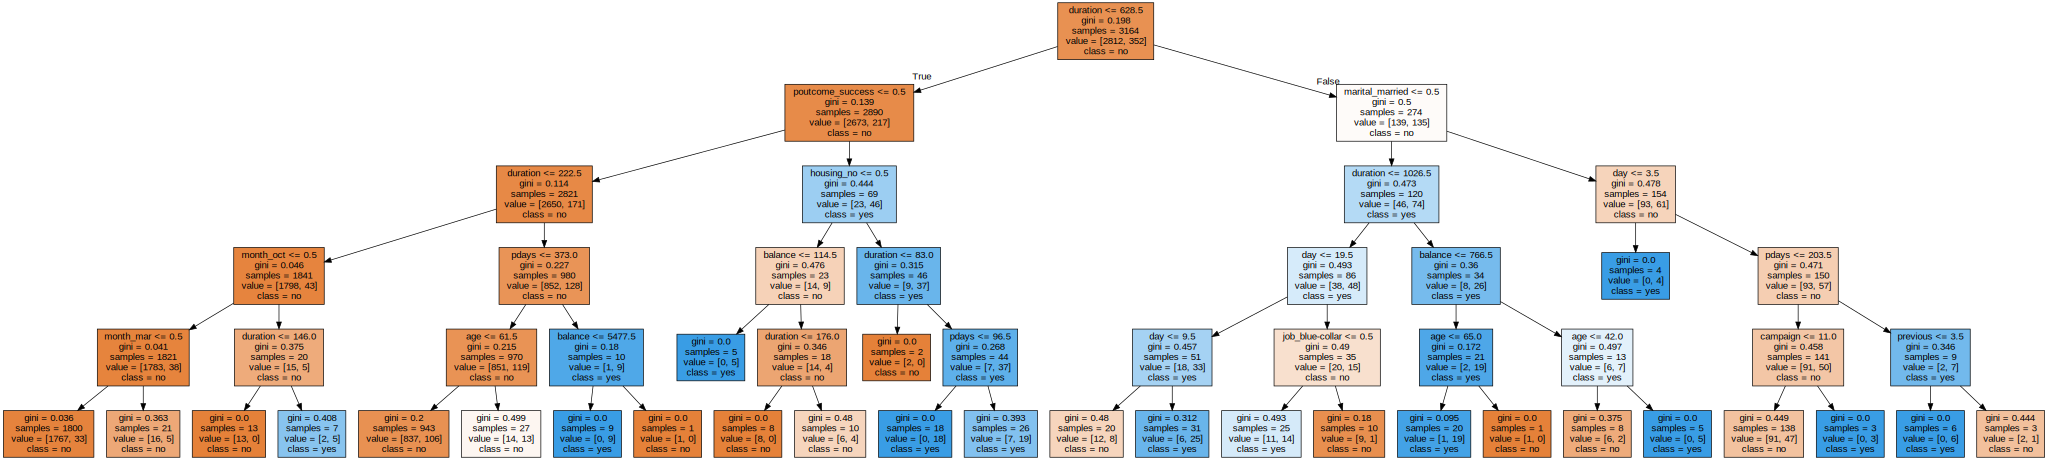

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
import graphviz
#Get unique class values to display on the tree
class_values=df_onehot[class_col_name].unique()
print ("class Names",class_values)

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=one_hot_feature_names,  
                                class_names=class_values,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


In [ ]:
# Perform prediction on the test set
y_pred = clf.predict(X_test)

In [ ]:
# Get classification report
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          no       0.91      0.97      0.94      1188
         yes       0.60      0.30      0.40       169

    accuracy                           0.89      1357
   macro avg       0.75      0.63      0.67      1357
weighted avg       0.87      0.89      0.87      1357



**Appendix**

**Exploratory Analysis**

We have learnt how to implement classification algorithms in Python but we have just done basic exploratory data analysis in the beginning using info function, describe function,and  head function of Pandas. Here is a very good Python pacakge that performs varirty of the basic analysis by itself and generates a report for you. You can analyze mising values, dupicate values, correlation, etc.


In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)

In [ ]:
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

After you have performed exploratory analysis and determined the features or rows you would like to remove (if any) then you can use simple pandas statements to select a subset of data frame. Here is the documentation: https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/03_subset_data.html. For example, if you want to drop a column name "Phone Number" then you can use: 

df=df.drop(columns=['Phone Number'])

Learning Pandas will be useful for you in the long run as it is used everywhere in data science world. After doing any feature selection (or fitering of rows) you can run the above decision tree and Naive Bayes models again for comparison with original data.



```
For CIND 119 course at Ryerson
  by Syed Shariyar Murtaza,Ph.D.
```

